# Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy as sp

# Problem 1a

[-3.14159265 -2.0943951  -1.04719755  0.          1.04719755  2.0943951
  3.14159265]
[0. 1. 3. 4. 3. 1. 0.]


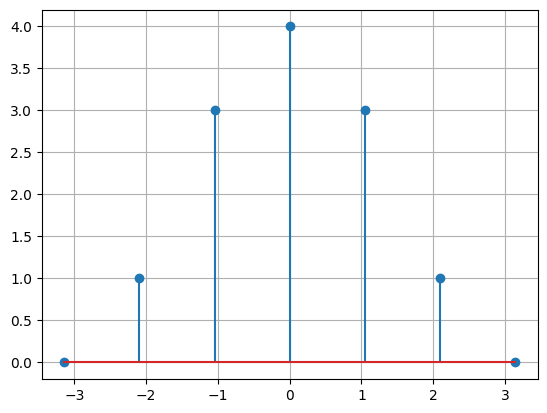

In [2]:
w = np.linspace(-np.pi, np.pi, 7)
X = np.zeros(len(w))

for i in range(len(w)):
    X[i] = 2 + 2 * np.cos(w[i])

print(w)
print(X)

plt.stem(w, X)
plt.grid()
plt.show()

# Problem 1b

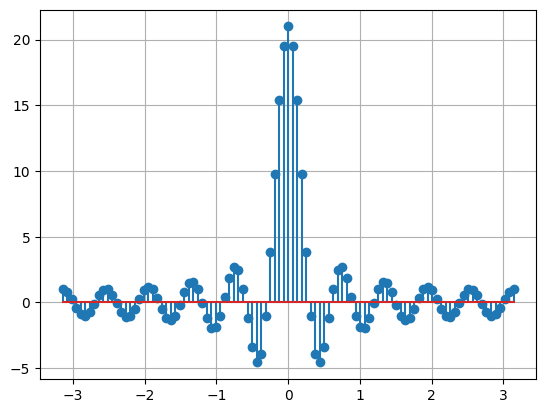

In [ ]:
M=10
w = np.linspace(-np.pi, np.pi, 101)
Y = np.zeros(len(w))

for i in range(len(w)):
    Y[i] = (np.sin(w[i] * (M + 1/2))) / (np.sin(w[i]/2))

#print(Y)
#print(w)

plt.stem(w, Y)
plt.grid()
plt.show()

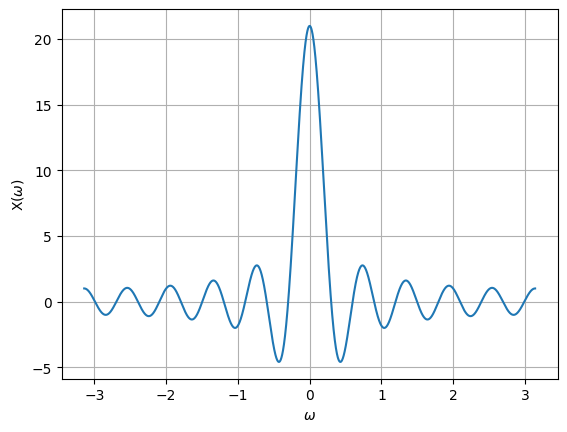

In [13]:
M=10
w = np.linspace(-np.pi, np.pi, 100000)

Y = (np.sin(w * (M + 0.5))) / (np.sin(w/2))

plt.plot(w, Y)
plt.xlabel(r"$\omega$")
plt.ylabel(r"X($\omega$)")
plt.grid()
plt.show()

# Problem 1d

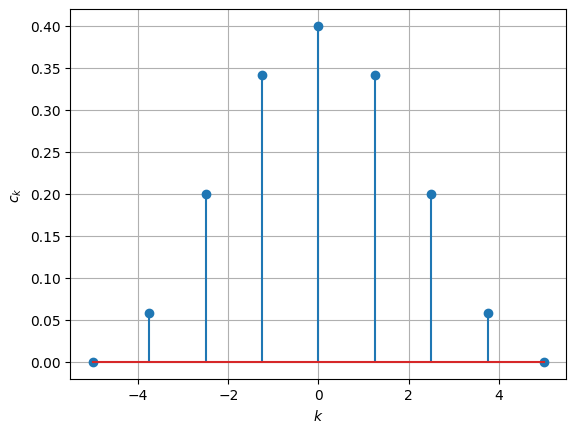

In [22]:
N = 10
w = np.arange(-np.pi, np.pi + np.pi / 4, np.pi / 4)
k = (w * N) / (2 * np.pi)
c = np.zeros(len(w))
# print(c)

for i in range(len(w)):
    c[i] = ((1 / N) * (2 + 2 * np.cos(2 * np.pi * k[i] / N)))


plt.stem(k, c)
plt.xlabel(r"$k$")
plt.ylabel(r"$c_k$")
plt.grid()
plt.show()

# Problem 3c

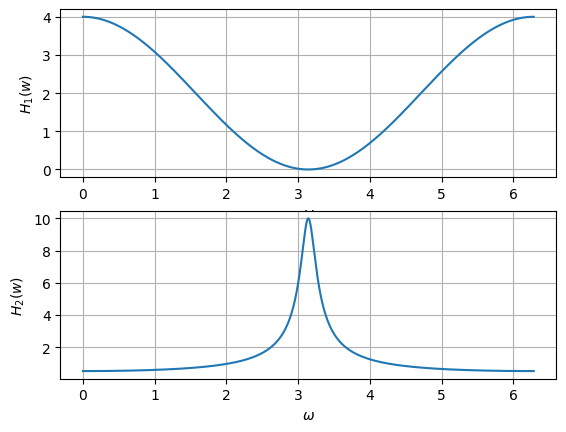

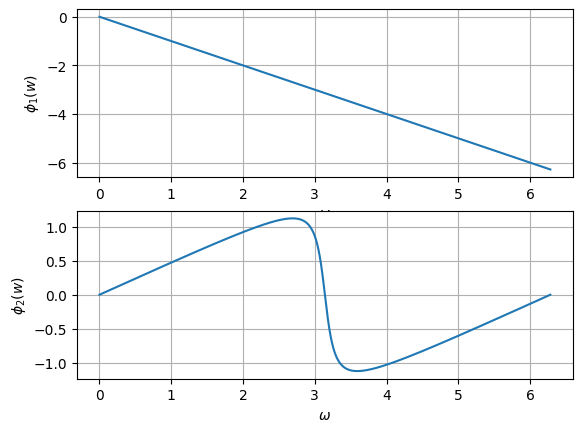

In [51]:
# Plotting first both mdagnitudes
w = np.linspace(0, 2*np.pi, 10000)

def H1(w):
    return 2 + 2 * np.cos(w)

def H2(w):
    return 1 / np.sqrt(1.81 + 1.8 * np.cos(w))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w, H1(w))
ax1.grid()
ax1.set(xlabel=r"$\omega$", ylabel=r"$H_1(w)$")
ax2.plot(w, H2(w))
ax2.grid()
ax2.set(xlabel=r"$\omega$", ylabel=r"$H_2(w)$")
plt.show()


# Now plotting both phases
def p1(w):
    return (-1) * w
def p2(w):
    return np.arctan((0.9 * np.sin(w)) / (1 + 0.9 * np.cos(w)))

fig, (ax3, ax4) = plt.subplots(2)
ax3.plot(w, p1(w))
ax3.grid()
ax3.set(xlabel=r"$\omega$", ylabel=r"$\phi_1(w)$")
ax4.plot(w, p2(w))
ax4.grid()
ax4.set(xlabel=r"$\omega$", ylabel=r"$\phi_2(w)$")
plt.show()

# We are only interested in w (element in) [0, pi]
# as everything else after this is just a repetition.

In [ ]:
# Using the functions that was in exercise
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

# Method 1: Using your analytical functions H1(w) and H2(w)
w = np.linspace(0, 2*np.pi, 10000)

def H1(w):
    return 2 + 2 * np.cos(w)

def H2(w):
    return 1 / np.sqrt(1.81 + 1.8 * np.cos(w))

# Calculate complex frequency responses
H1_response = H1(w)
H2_response = H2(w)

# Plot magnitudes and phases for analytical functions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Magnitude plots
ax1.plot(w, np.abs(H1_response))
ax1.set_title('H1(w) - Magnitude')
ax1.set_xlabel('Frequency (rad)')
ax1.set_ylabel('Magnitude')
ax1.grid(True)

ax2.plot(w, np.abs(H2_response))
ax2.set_title('H2(w) - Magnitude') 
ax2.set_xlabel('Frequency (rad)')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

# Phase plots
ax3.plot(w, np.angle(H1_response))
ax3.set_title('H1(w) - Phase')
ax3.set_xlabel('Frequency (rad)')
ax3.set_ylabel('Phase (rad)')
ax3.grid(True)

ax4.plot(w, np.angle(H2_response))
ax4.set_title('H2(w) - Phase')
ax4.set_xlabel('Frequency (rad)')
ax4.set_ylabel('Phase (rad)')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Method 2: Using sp.signal.freqz() for filter coefficients
# Example: Creating filters from transfer functions

# For a simple filter example, let's create some filter coefficients
# H(z) = (2 + 2z^-1) / (1) corresponds to b = [2, 2], a = [1]
b1 = [2, 2]  # numerator coefficients for H1-like filter
a1 = [1]     # denominator coefficients

# Another example filter
b2 = [1, 0.5]    # numerator coefficients
a2 = [1, -0.3]   # denominator coefficients

# Using sp.signal.freqz() to compute frequency response
w_freqz, h1_freqz = sp.signal.freqz(b1, a1, worN=10000)
w_freqz, h2_freqz = sp.signal.freqz(b2, a2, worN=10000)

# Plot using freqz results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Magnitude plots using np.abs()
ax1.plot(w_freqz, np.abs(h1_freqz))
ax1.set_title('Filter 1 - Magnitude (using freqz)')
ax1.set_xlabel('Frequency (rad)')
ax1.set_ylabel('Magnitude')
ax1.grid(True)

ax2.plot(w_freqz, np.abs(h2_freqz))
ax2.set_title('Filter 2 - Magnitude (using freqz)')
ax2.set_xlabel('Frequency (rad)')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

# Phase plots using np.angle()
ax3.plot(w_freqz, np.angle(h1_freqz))
ax3.set_title('Filter 1 - Phase (using freqz)')
ax3.set_xlabel('Frequency (rad)')
ax3.set_ylabel('Phase (rad)')
ax3.grid(True)

ax4.plot(w_freqz, np.angle(h2_freqz))
ax4.set_title('Filter 2 - Phase (using freqz)')
ax4.set_xlabel('Frequency (rad)')
ax4.set_ylabel('Phase (rad)')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Method 3: Converting your analytical functions to use with freqz
# If you want to use freqz with your specific functions, you need filter coefficients

print("Key points about these functions:")
print("1. sp.signal.freqz(b, a) computes frequency response of a digital filter")
print("   - b: numerator coefficients (zeros)")
print("   - a: denominator coefficients (poles)")
print("   - Returns: (frequencies, complex_response)")
print("")
print("2. np.abs(complex_array) computes magnitude of complex numbers")
print("   - Takes complex frequency response and returns magnitude")
print("")
print("3. np.angle(complex_array) computes phase of complex numbers")
print("   - Takes complex frequency response and returns phase in radians")
print("")
print("4. For your analytical functions H1(w) and H2(w):")
print("   - They're already real-valued, so np.abs() gives magnitude")
print("   - np.angle() will mostly be 0 (except where negative)")

# Demonstration of phase behavior with your functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Show where H1 becomes negative (phase jumps to π)
ax1.plot(w, H1(w), label='H1(w)')
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.set_title('H1(w) - Note where it goes negative')
ax1.set_xlabel('Frequency (rad)')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True)

# Phase of H1 - shows π where H1 is negative
ax2.plot(w, np.angle(H1(w)))
ax2.set_title('Phase of H1(w)')
ax2.set_xlabel('Frequency (rad)')
ax2.set_ylabel('Phase (rad)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

f = 0.5
t = 1

Fs1 = 4000
Fs2 = 1500

N1 = Fs1 * t
N2 = Fs2 * t
n1 = np.arange(N1)
n2 = np.arange(N2)
print(n1)

xa = np.cos(2000 * np.pi * n1)
print(xa)

# sd.play(myarray, fs)
sd.play(xa, Fs1)
sd.wait()

[   0    1    2 ... 3997 3998 3999]
[1. 1. 1. ... 1. 1. 1.]


In [ ]:
import numpy as np
import sounddevice as sd

f = 1000
T = 1

fs1 = 4000
fs2 = 1500
t1 = np.arange(0, T, 1/fs1)
t2 = np.arange(0, T, 1/fs2)
x1 = np.cos(2 * np.pi * f * t1)

print(t1)
print(x1)

sd.play(x1, fs1)
sd.wait()

# change between variables

[0.0000e+00 2.5000e-04 5.0000e-04 ... 9.9925e-01 9.9950e-01 9.9975e-01]
[ 1.00000000e+00  6.12323400e-17 -1.00000000e+00 ...  1.13825315e-12
 -1.00000000e+00 -8.07973246e-13]
